In [ ]:
'''
Programmet använder minsta kvadrat metoden för att passa mätpunkter from 'Temperaturer_2022.csv'
kurver använder polynom, koefficient kan fås enligt Gauss elimination metoden
kurver ritas när polynoms ordningar är från 1 till 4 för att jamföra

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Gauss Eliminering funktion

In [13]:
def Gauss_Elim(X,Y):
    n =np.shape(A)[0] # antal rader 
    #a är polynomkoefficient
    a = np.zeros(n)
    i = 0
    
    matris = np.concatenate((X,Y),axis =1, dtype = float)
    
    while i < n:
        for j in range(i+1,n):
            skal_faktor = matris[j,i]/matris[i,i]
            matris[j] = matris[j]-skal_faktor*matris[i]
        i = i+1
    
    #a[m] = matris[m][n] / matris[m][m]
    for i in range(n-1,-1,-1):
        a[i] = (matris[i,-1]-matris[i,0:n]@a)/matris[i,i]
    return a



In [4]:
#skapa A och Y for Gauss funktionen

In [5]:
def Create_matrix(x,y,k):
    #skapa Vandermonde matris för x
    #X'XA =X'y, minsta-kvardratmetoden form för Gauss elimination
    X = np.vander(x,k+1)
    Xt = X.transpose()
    X = np.dot(Xt,X)
    Y = np.dot(Xt,y)
    Y = np.expand_dims(Y,axis=1)
    return X,Y

    

In [6]:
#Visa funktionsformel

In [82]:
def Show_Fun(a,k):
    f=''
    for i in range(k,0,-1):
        f=f+f"({round(a[k-i],2)})x^{i}+"
        
    f = f + f"{round(a[k],2)}"
    return f
     

In [8]:
# rita figures

In [72]:
def Rita_Fig(x,y,a):

    k=len(a)-1
    #rita kända mätpunkten
    #plt.plot(x,y,marker='o',color='r',linestyle='',label ='mätpunkter')
        
    #rita simulerade kurvan
    x_pred = np.arange(x.min(),x.max(),0.01)
    y_pred =[]
    for i in range(0,len(x_pred)):
        yy = 0
        for j in range(0,k+1):
            yy = yy+a[j]*x_pred[i]**(k-j)
        y_pred.append(yy)
    k_label =f'prognoskurva order={k}'
    plt.plot(x_pred,y_pred,linestyle='-',label= k_label)
    
    plt.xlabel('månader')
    plt.ylabel('temperatur')
    #plt.show()

In [ ]:
'''-----------------------------'''

In [ ]:
#läser in data från csv-filen


In [76]:
Tem_df = pd.read_csv('Temperaturer_2020.csv')
x = Tem_df['Månader'].values
y = Tem_df['Temperatur'].values

In [ ]:
#När ordning är 1, alltså y = kx + m

In [79]:
X,Y= Create_matrix(x,y,1)

In [80]:
a = Gauss_Elim(X,Y)

In [83]:
Show_Fun(a,1)

'(0.42)x^1+6.03'

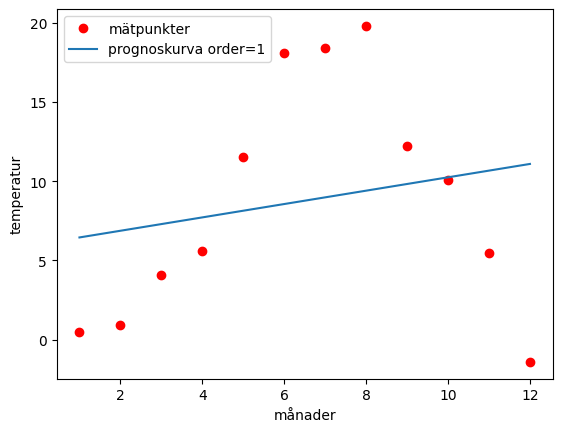

In [85]:
plt.plot(x,y,marker='o',color='r',linestyle='',label ='mätpunkter')
Rita_Fig(x,y,a)
plt.legend()
plt.show()

In [ ]:
'''
-------------------------------------
Jamför när ordningen är från 1 till 4
De visar att ju ordningen är större desto är kurvan nära mätpunkter
men det kommer att överfita
-------------------------------------
'''

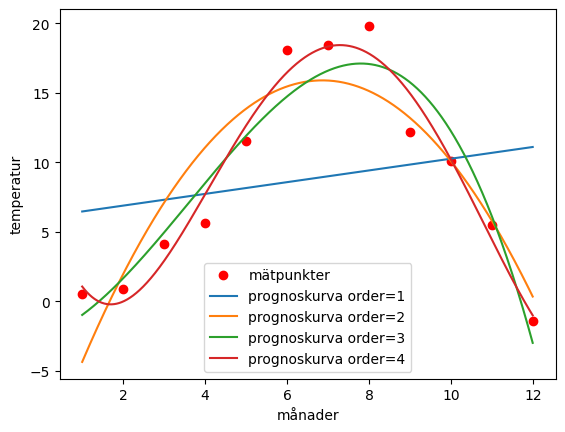

In [75]:
plt.plot(x,y,marker='o',color='r',linestyle='',label ='mätpunkter')
for order in range(1,5):
    X,Y= Create_matrix(x,y,order)
    a = Gauss_Elim(X,Y)
    Rita_Fig(x,y,a)
plt.legend()
plt.show()